The k-means algorithm does the following:

Given a set of points, we first choose k random points to be the initial centroids.

We then create k clusters. The ith cluster contains the points nearest to the ith centroid.

Now, we calculate the means of points in each cluster. Thus we have k means. These k means form the updated k centroids. We then create new k clusters as described in step 2.

We keep doing steps 2. and 3. until the k centroids stop changing positions

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns 
# from sklearn.datasets.samples_generator import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler # transform the feature values to be normalized 
from sklearn.metrics import silhouette_samples,silhouette_score
%matplotlib inline
#The import section

In [47]:
df=pd.read_csv("faithful.csv")
print(df.shape)

(272, 2)


https://www.kaggle.com/janithwanni/old-faithful to download faithful.csv, but we just need second and third columns

In [48]:
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

Text(0.5, 1.0, 'Visualization of raw data')

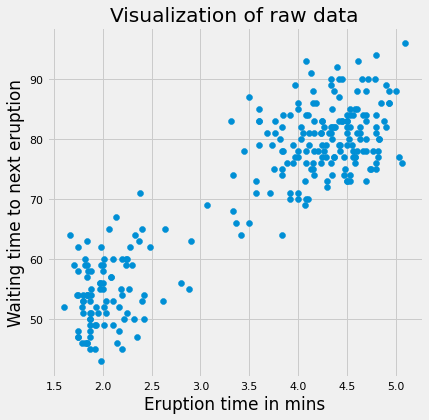

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.
    

In [62]:
print(df)
X_std=StandardScaler().fit_transform(df) # transform the data to within range [-2, 2]
print(X_std)

     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]
[[ 0.09849886  0.59712344]
 [-1.48145856 -1.24518118]
 [-0.13586149  0.22866251]
 [-1.05750332 -0.6556437 ]
 [ 0.91744345  1.03927655]
 [-0.53085085 -1.171489  ]
 [ 1.06402839  1.2603531 ]
 [ 0.09849886  1.03927655]
 [-1.34979544 -1.46625773]
 [ 0.75681445  1.03927655]
 [-1.45249268 -1.24518118]
 [ 0.37674691  0.96558436]
 [ 0.62515133  0.52343125]
 [-1.52534627 -1.76102647]
 [ 1.06402839  0.89189218]
 [-1.1593228  -1.39256555]
 [-1.52534627 -0.6556437 ]
 [ 1.1518038   0.96558436]
 [-1.65700939 -1.39256555]
 [ 0.66903904  0.59712344]
 [-1.48145856 -1.46625773]
 [-1.52534627 -1.76102647]
 [-0.03316426  0.52343125]
 [-0.36934409 -0.13979841]
 [ 0.91744345  0.22866251]
 [ 0.09849886

In [83]:
km=KMeans(n_clusters=2,max_iter=100)
km.fit(X_std)
centroids=km.cluster_centers_
print(centroids[:,0])
print(km.labels_)
print(km.labels_.shape)
print(X_std[km.labels_ == 0, 0])

[-1.26008539  0.70970327]
[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]
(272,)
[-1.48145856 -1.05750332 -0.53085085 -1.34979544 -1.45249268 -1.52534627
 -1.1593228  -1.52534627 -1.65700939 -1.48145856 -1.52534627 -1.33487362
 -1.29098592 -1.42264904 -1.45249268 -1.40860497 -1.52534627 -1.21813233
 -1.30590774 -1.45249268 -1.54026809 -1.59819986 -1.10139103 -1.52534627
 -1.46653674 -1.24709821 -1.33487362 -1.32082956 -1.29098592 -0.75028938
 -1.1593228  -1.13035691 -1.42264904 -1.45249268 

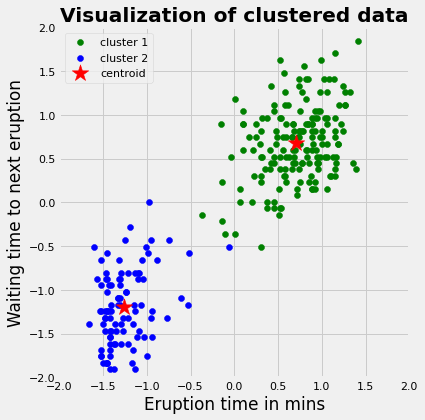

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [54]:
np.random.randint(0,1000) 

126

https://stackoverflow.com/questions/46108753/what-is-meant-by-the-term-random-state-in-kmeans-function-in-package-sklear
A gotcha with the k-means alogrithm is that it is not optimal. That means, it is not sure to find the best solution, as the problem is not convex (for the optimisation).

You may be stuck into local minima, and hence the result of your algorithm depends of your initialization (of your centroids). A good practice in order to find a good minimum is to rerun the algortihm several times with several initializations and keep the best result.

As stated by the others, random_state makes the results reproducible and can be useful for debugging


Random state in Kmeans function of sklearn mainly helps to

Start with same random data point as centroid if you use Kmeans++ for initializing centroids.
Start with same K random data points as centroid if you use random initialization.
This helps when one wants to reproduce results at some later point in time.

(2, 2)
[array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]])]


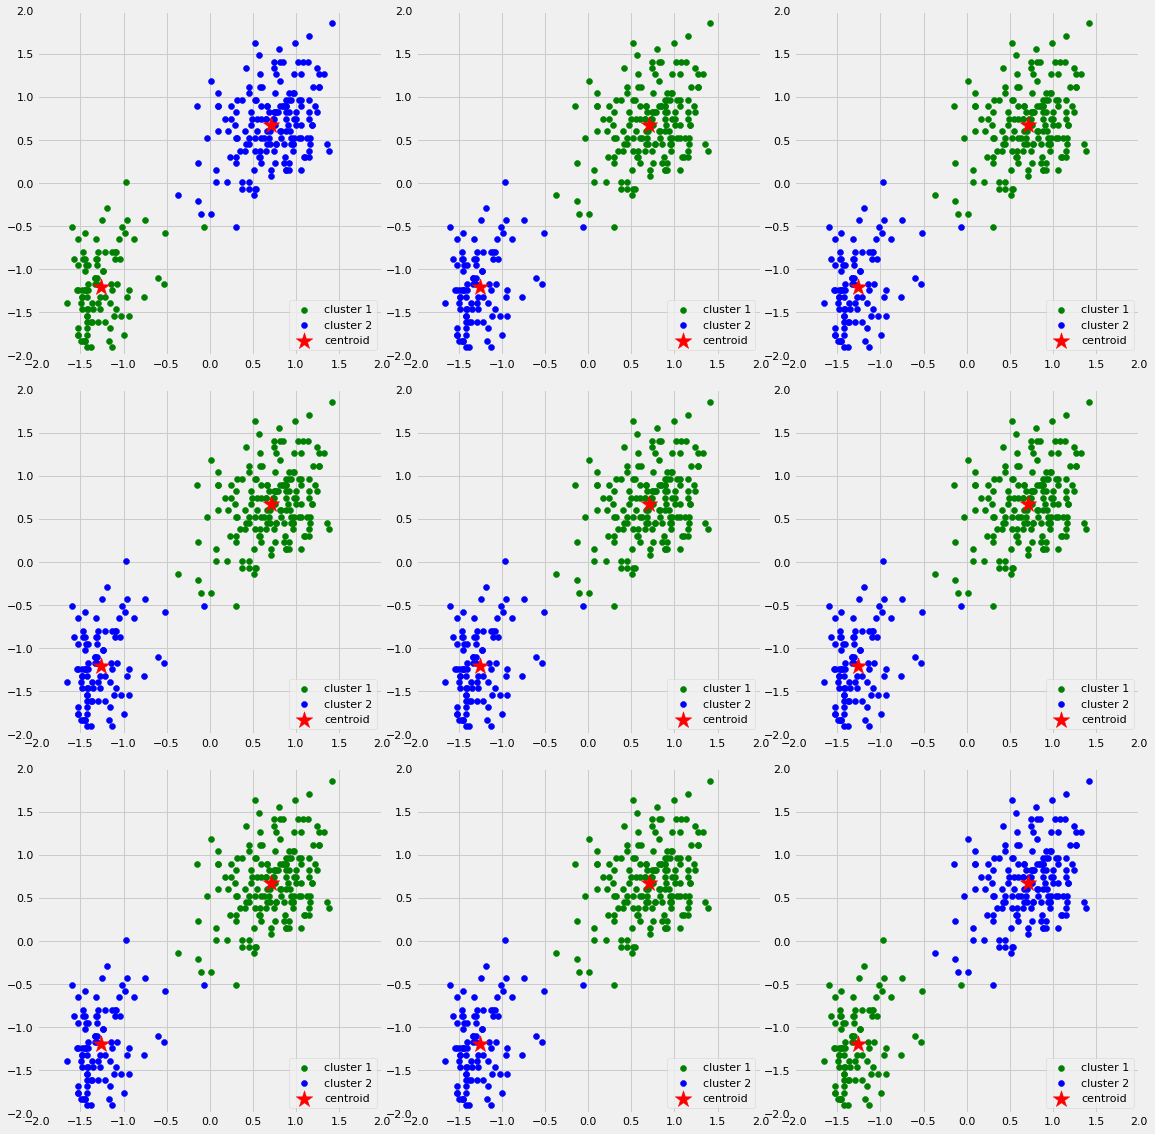

In [81]:
n_iter=9
fig,ax=plt.subplots(3,3,figsize=(16,16))
ax=np.ravel(ax) # flatten the ax array from 3,3 to 1x9 ax[0] to ax[9]
centers=[]
for i in range(n_iter):
    # Run local implementation of kmeans
#     km = KMeans(n_clusters=2,max_iter=3,random_state=np.random.randint(0, 10000)) #option1
    km = KMeans(n_clusters=2) # option2
#     km = KMeans(n_clusters=2,max_iter=100) # option3
    km.fit(X_std)
    centroids =km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();
print(centers[0].shape)
print(centers)

So far I don't understand why each iteration (of 9) gives the same centroid [0.70970327,  0.67674488],[-1.26008539, -1.20156744].
I tried 3 different Kmeans initialization:
    #     km = KMeans(n_clusters=2,max_iter=3,random_state=np.random.randint(0, 10000)) #option1
    
    km = KMeans(n_clusters=2) # option2 
    
    #     km = KMeans(n_clusters=2,max_iter=100) # option3
    